# Read spectral Data

In [7]:
from read import SpectralState
#s = SpectralState('stateSpectralShellQuICC.hdf5', 'sphere', 'quicc')
#s = SpectralState('stateSpectralSphereQuICC.hdf5', 'sphere', 'quicc')
s = SpectralState('stateSpectralEPM.hdf5')
print('Vel Pol:', s.fields.velocity_pol.shape)
print('Vel Tor:', s.fields.velocity_tor.shape)

Vel Pol: (66, 11)
Vel Tor: (66, 11)


# A) $\omega_f$ : uniform vorticity 

In [8]:
from sphere import getUniformVorticity
rmax = 1
omegaF=getUniformVorticity(s, rmax)
print('Omega_f: ', omegaF)

Omega_f:  [-2.18317115e-16  1.00000000e+00 -2.65032236e-19]


# B) Align with the fluid axis

In [9]:
#%pdb
from sphere import alignAlongFluidAxis
alignAlongFluidAxis(s, omegaF)

# C) Write state file  

# D) $\gamma_f$: rotation angle of the fluid   

In [10]:
from sphere import getGammaF
#filename = ''
#getGammaF()

# E) Go to Fluid Frame 

In [11]:
from sphere import goToFluidFrameOfReference
#getGammaF(filename)
gamma = 0
goToFluidFrameOfReference(s, gamma)

# F) Get Integrator

In [12]:
from sphere import getZIntegrator
nNs = 40
zInt = getZIntegrator(s, "uS", nNs)

id_s:  0 time:  0.25002098083496094
id_s:  1 time:  0.22879981994628906
id_s:  2 time:  0.22570085525512695
id_s:  3 time:  0.23874998092651367
id_s:  4 time:  0.27028608322143555
id_s:  5 time:  0.253093957901001
id_s:  6 time:  0.3261401653289795
id_s:  7 time:  0.24921607971191406
id_s:  8 time:  0.24439120292663574
id_s:  9 time:  0.27327704429626465
id_s:  10 time:  0.24306511878967285
id_s:  11 time:  0.24133801460266113
id_s:  12 time:  0.24600696563720703
id_s:  13 time:  0.24718284606933594
id_s:  14 time:  0.22960710525512695
id_s:  15 time:  0.2636141777038574
id_s:  16 time:  0.24435710906982422
id_s:  17 time:  0.2666358947753906
id_s:  18 time:  0.22594404220581055
id_s:  19 time:  0.23612499237060547
id_s:  20 time:  0.23010683059692383
id_s:  21 time:  0.23801183700561523
id_s:  22 time:  0.22690200805664062
id_s:  23 time:  0.2501208782196045
id_s:  24 time:  0.2783668041229248
id_s:  25 time:  0.38429880142211914
id_s:  26 time:  0.24712800979614258
id_s:  27 time:  0

# E) Get Z-Integral

In [13]:
from sphere import getZIntegral 
zIntegral = getZIntegral(s, zInt)

# E) Get Slices

In [14]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


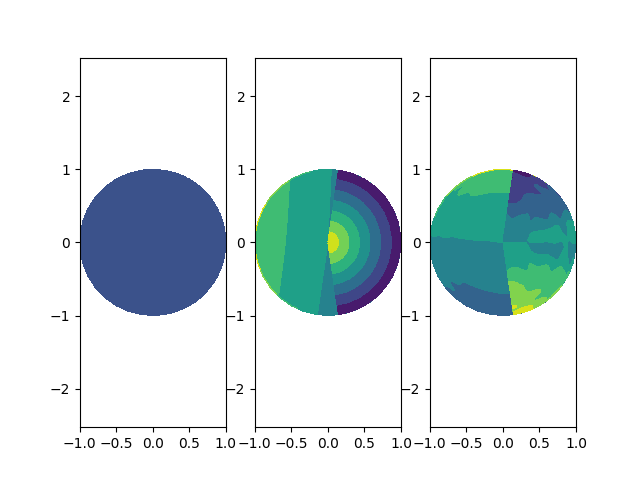

In [15]:
from read import makeEquatorialSlice
eqSlice=makeEquatorialSlice(s)
#eqSlice=s.makeEquatorialSlice()
plt.subplot(131)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_r'].T)
plt.subplot(132)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_theta'].T)
plt.subplot(133)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_phi'].T)

In [17]:
from read import makeMeridionalSlice
#merSlice=s.makeMeridionalSlice()
merSlice=makeMeridionalSlice(s)
plt.subplot(131)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_r'].T)
plt.subplot(132)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_theta'].T)
plt.subplot(133)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_phi'].T)

<IPython.core.display.Javascript object>